#  <span style='color:blue'><b>1. Introduction</span></b>


##  <span style='color:blue'><b>1.1 Import Libraries</span></b>

In [87]:
!pip uninstall -y pandas-profiling
!pip install ydata-profiling


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

from ydata_profiling import ProfileReport

In [53]:
#Seaborn settings for visualizations!
rc = {
    "axes.facecolor": "#f7f9fc",
    "figure.facecolor": "#f7f9fc",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

default_palette = 'YlOrRd'

sns.set(rc=rc)
pd.set_option('display.max_columns',35)
pd.options.display.float_format = '{:,.2f}'.format

##  <span style='color:blue'><b>1.2 Import Data</span></b>

In [67]:
from google.colab import files
uploaded = files.upload()

Saving morceaux_par_playlists_avec_genres2.csv to morceaux_par_playlists_avec_genres2 (3).csv


In [69]:
import pandas as pd
df = pd.read_csv('morceaux_par_playlists_avec_genres2.csv')

##  <span style='color:blue'><b>1.3 Summary of the data</span></b>

In [70]:
#Let's check the Shape of data
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 222 rows and 5 columns


In [71]:
df.describe()

,Popularité
count,222.00
mean,29.07
std,17.57
min,1.00
25%,14.25
50%,28.00
75%,42.00
max,72.00


In [72]:
def summary(df):
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values
    summ['Duplicate'] = df.duplicated().sum()
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['avg'] = desc['mean'].values
    summ['std dev'] = desc['std'].values
    summ['top value'] = desc['top'].values
    summ['Freq'] = desc['freq'].values

    return summ

In [81]:
summary(df).style.background_gradient()

,data type,#missing,Duplicate,#unique,min,max,avg,std dev,top value,Freq
Nom de la playlist,object,0,0,4,nan,nan,nan,nan,Ma playlist,72
Popularité,int64,0,0,72,1.000000,72.000000,29.067568,17.569769,nan,nan
Nom du morceau,object,0,0,182,nan,nan,nan,nan,Die With A Smile,4
Artiste,object,0,0,136,nan,nan,nan,nan,Bad Bunny,17
Genres musicaux,object,27,0,73,nan,nan,nan,nan,"reggaeton, trap latino, urbano latino",23


In [91]:
def showplot(columnname):
    value_counts = df[columnname].value_counts()
    colors = sns.color_palette("muted")

    # Plotting
    fig, axs = plt.subplots(1, 2, figsize=(10, 4), facecolor='white')

    # Donut Chart
    axs[0].pie(value_counts, autopct='%1.1f%%', colors=colors, startangle=80, wedgeprops=dict(width=0.4), pctdistance=1.2, textprops={'fontsize': 10, 'color': 'black'})

    # Count Plot
    sns.countplot(data=df, y=columnname, ax=axs[1], palette=colors, order=value_counts.index)
    for i, (count, label) in enumerate(zip(value_counts, value_counts.index)):
        # Adding count labels to bars with adjusted position
        axs[1].text(count + 1, i + 0.1, str(count), color='black', fontsize=10)

    sns.despine(ax=axs[1], left=True, bottom=True)

    # Adjusting labels and title
    axs[1].set(ylabel=None, xlabel=None, yticklabels=value_counts.index)
    fig.suptitle(columnname, fontsize=15)

    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()


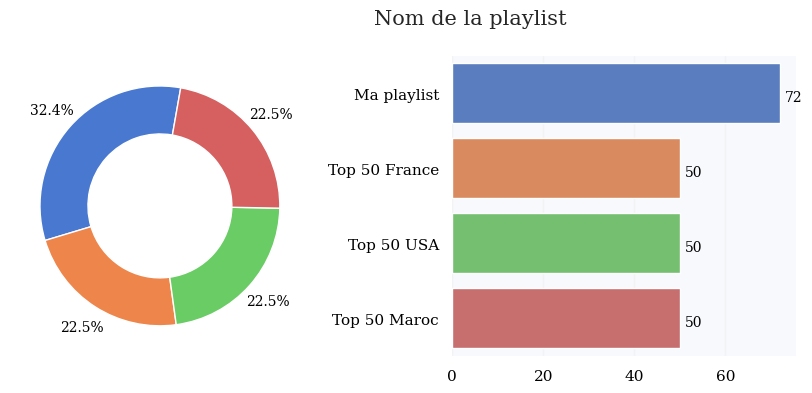

In [92]:
showplot("Nom de la playlist")

In [77]:
 #Créer un rapport
profile = ProfileReport(df, title="Rapport exploratoire", explorative=True)

# Afficher le rapport dans Colab
profile.to_notebook_iframe()

# Sauvegarder le rapport au format HTML
profile.to_file("rapport.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Répartition des morceaux par playlist

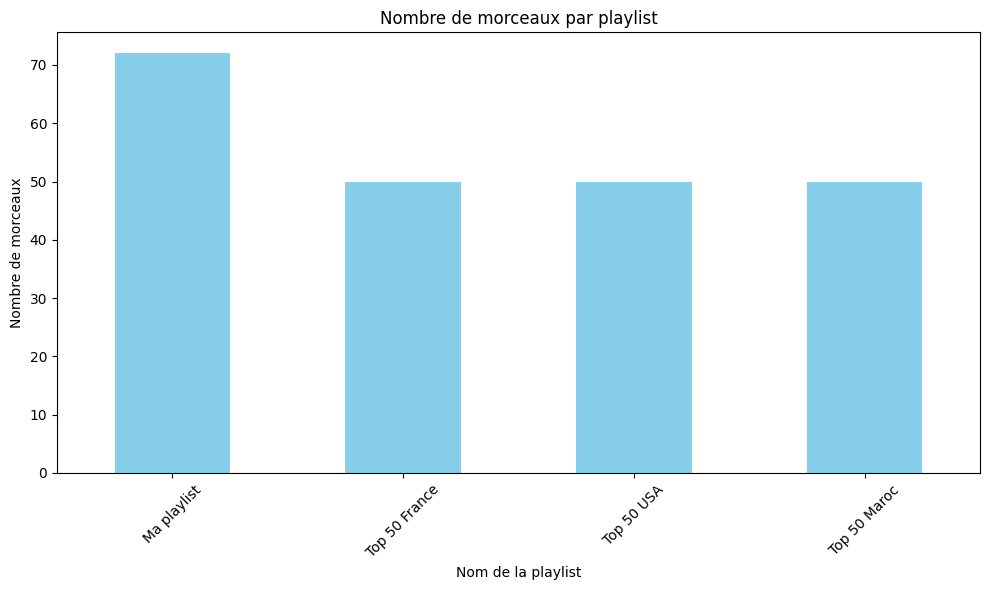

In [ ]:
playlist_counts = df['Nom de la playlist'].value_counts()

# Visualisation
plt.figure(figsize=(10, 6))
playlist_counts.plot(kind='bar', color='skyblue')
plt.title("Nombre de morceaux par playlist")
plt.xlabel("Nom de la playlist")
plt.ylabel("Nombre de morceaux")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Artistes les plus fréquents dans les playlists

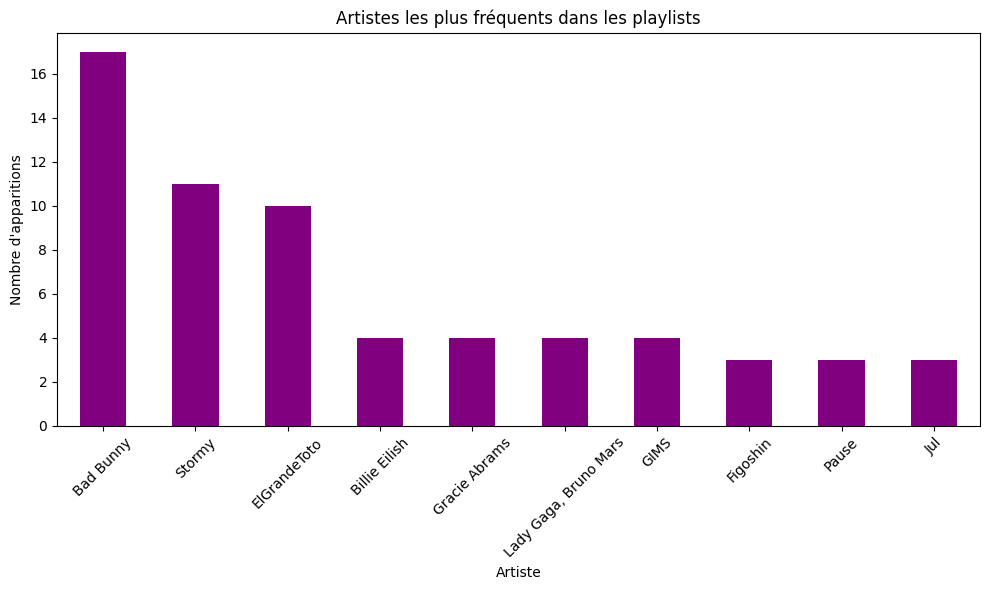

In [ ]:
# Comptage des artistes
top_artists = df['Artiste'].value_counts().head(10)

# Visualisation
plt.figure(figsize=(10, 6))
top_artists.plot(kind='bar', color='purple')
plt.title("Artistes les plus fréquents dans les playlists")
plt.xlabel("Artiste")
plt.ylabel("Nombre d'apparitions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualisation des genres dominants par région

<ipython-input-25-7d9ecc9d3e5a>:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


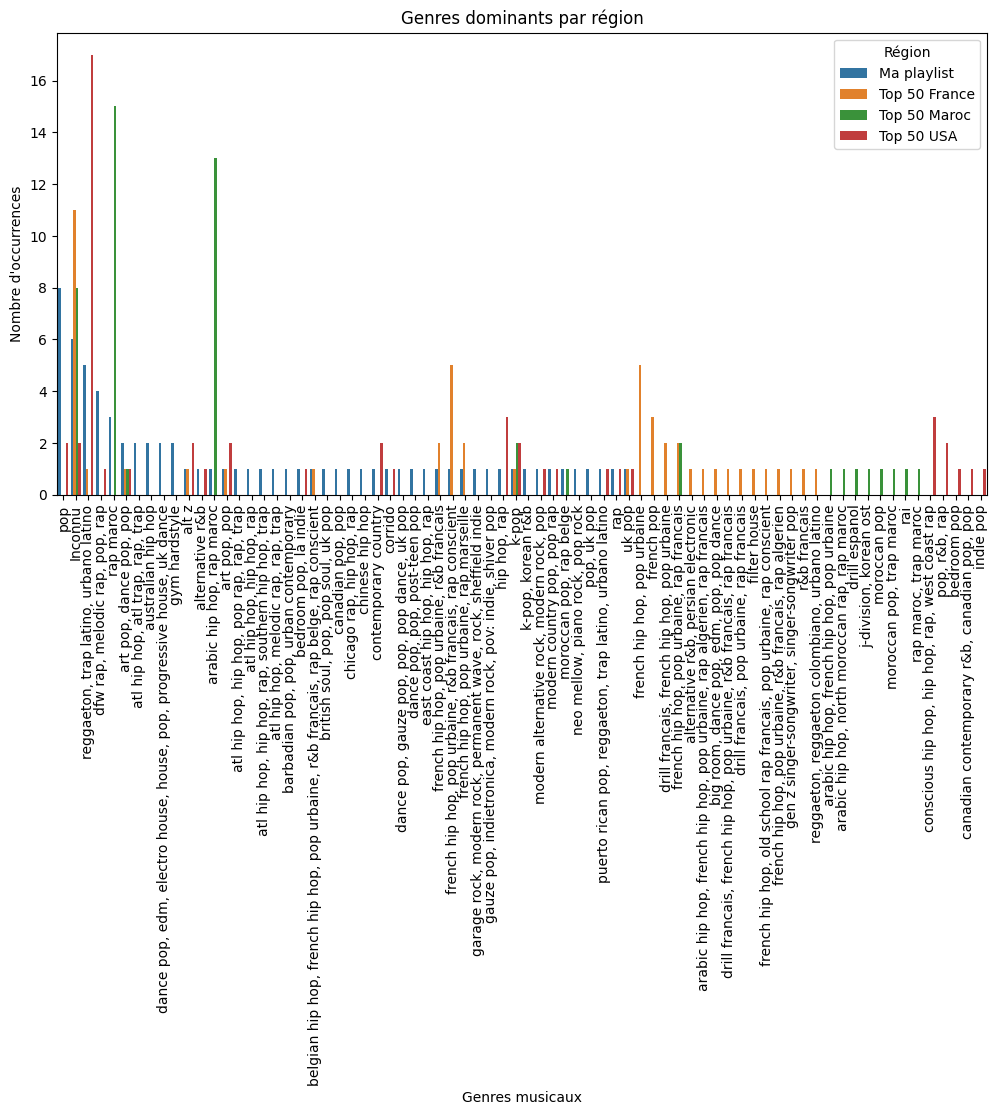

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assurez-vous que les genres manquants sont remplis
df['Genres musicaux'] = df['Genres musicaux'].fillna('Inconnu')

# Séparer les genres et les compter par région
genres_counts = df.explode('Genres musicaux').groupby('Nom de la playlist')['Genres musicaux'].value_counts()
genres_counts = genres_counts.reset_index(name='Counts')

# Diagramme en barres
plt.figure(figsize=(12, 6))
sns.barplot(x='Genres musicaux', y='Counts', hue='Nom de la playlist', data=genres_counts)
plt.xticks(rotation=90)
plt.title("Genres dominants par région")
plt.xlabel("Genres musicaux")
plt.ylabel("Nombre d'occurrences")
plt.legend(title="Région")
plt.tight_layout()
plt.show()

# Comparaison des artistes les plus populaires

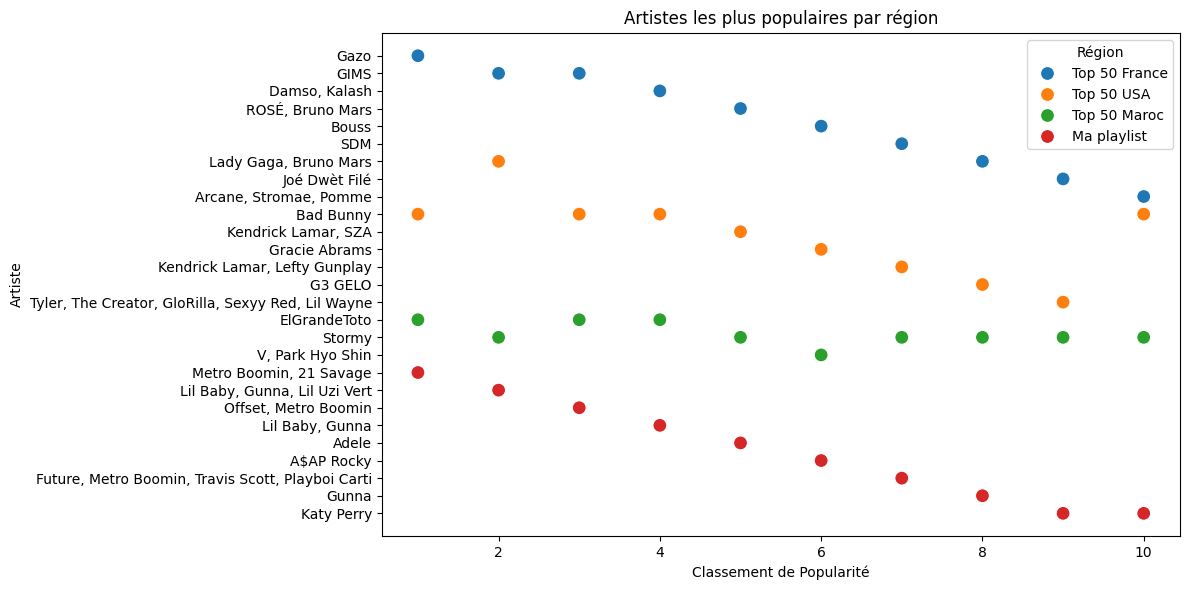

In [ ]:
# Filtrer les morceaux avec les meilleures popularités (par exemple, top 10 de chaque région)
top_popular_songs = df[df['Popularité'] <= 10]

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Popularité', y='Artiste', hue='Nom de la playlist', data=top_popular_songs, s=100)
plt.title("Artistes les plus populaires par région")
plt.xlabel("Classement de Popularité")
plt.ylabel("Artiste")
plt.legend(title="Région")
plt.tight_layout()
plt.show()

# Identifier le genre musical dominant par playlist

In [ ]:
df['Genres musicaux'] = df['Genres musicaux'].fillna('Inconnu')

# Séparer les genres si plusieurs sont dans une cellule (par exemple, séparés par une virgule)
df['Genres musicaux'] = df['Genres musicaux'].str.split(',')

# Transformer les genres musicaux en lignes individuelles
df_exploded = df.explode('Genres musicaux')

# Compter les occurrences des genres par playlist
genre_counts = df_exploded.groupby(['Nom de la playlist', 'Genres musicaux']).size().reset_index(name='Counts')

# Identifier le genre dominant pour chaque playlist
dominant_genres = genre_counts.loc[genre_counts.groupby('Nom de la playlist')['Counts'].idxmax()]

# Afficher le résultat
print(dominant_genres)

    Nom de la playlist Genres musicaux  Counts
15         Ma playlist             pop      15
83       Top 50 France     pop urbaine      24
129       Top 50 Maroc       rap maroc      16
141         Top 50 USA     trap latino      18
